<a href="https://colab.research.google.com/github/Saubha/Grain-size-analysis/blob/main/Ex_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experiment - 10

Aim: To understand Basic Hierarchical Clustering

Objective: Student will learn how this method helps groups similar data points into clusters by creating a hierarchical structure of the clusters

Input/Apparatus Used: Python computer program

Procedure/Algorithm/Code:

### Hierarchical Clustering
Hierarchical clustering is an unsupervised learning method for clustering data points. The algorithm builds clusters by measuring the dissimilarities between data. Unsupervised learning means that a model does not have to be trained, and we do not need a "target" variable. This method can be used on any data to visualize and interpret the relationship between individual data points.


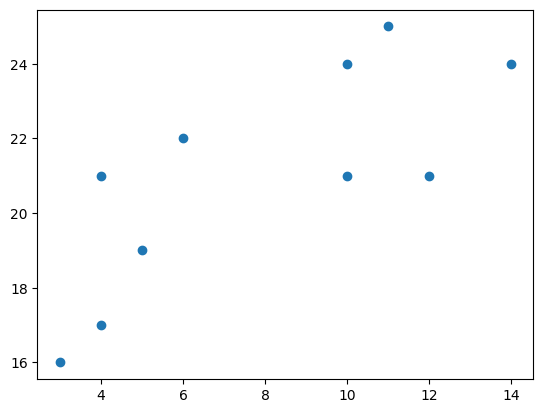

In [ ]:
#Start by visualizing some data points:

import numpy as np
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

Now we compute the ward linkage using euclidean distance, and visualize it using a dendrogram:


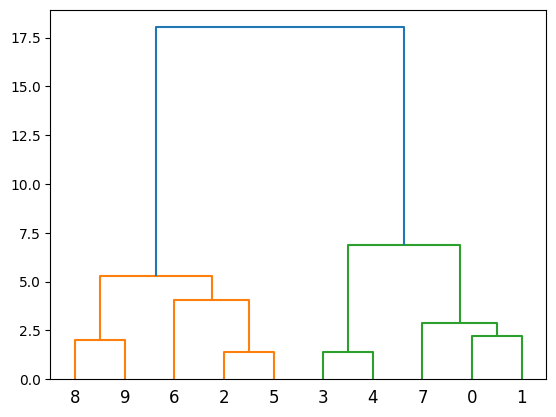

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

Here, we do the same thing with Python's scikit-learn library. Then, visualize on a 2-dimensional plot:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


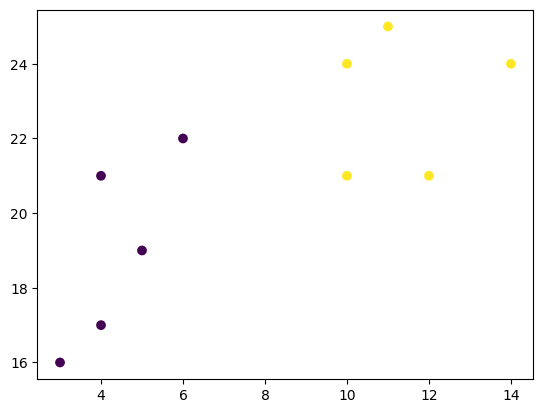

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(x, y, c=labels)
plt.show()

In [1]:
# Importing the libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

In [6]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')

print(dataset)


     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
245         246    Male   30                 297                      69
246         247  Female   56                 311                      14
247         248    Male   29                 313                      90
248         249  Female   19                 316                      32
249         250  Female   31                 325                      86

[250 rows x 5 columns]


Here we will extract only the matrix of features as we don't have any further information about the dependent variable. Code is given below:

In [7]:
x = dataset.iloc[:, [3, 4]].values

Now we will find the optimal number of clusters using the Dendrogram for our model. For this, we are going to use scipy library as it provides a function that will directly return the dendrogram for our code. Consider the below lines of code:

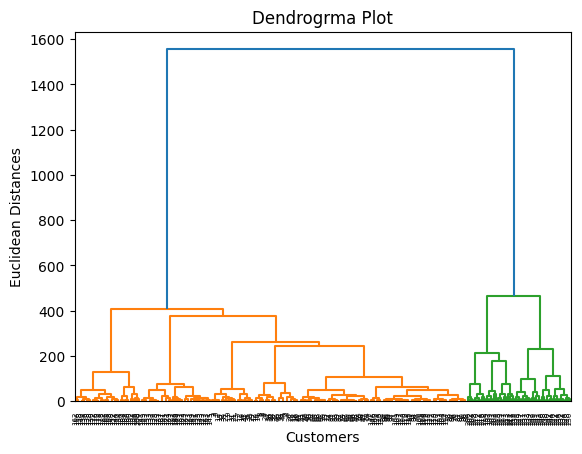

In [8]:
#Finding the optimal number of clusters using the dendrogram
import scipy.cluster.hierarchy as shc
dendro = shc.dendrogram(shc.linkage(x, method="ward"))
mtp.title("Dendrogrma Plot")
mtp.ylabel("Euclidean Distances")
mtp.xlabel("Customers")
mtp.show()

In the above lines of code, we have imported the hierarchy module of scipy library. This module provides us a method shc.denrogram(), which takes the linkage() as a parameter. The linkage function is used to define the distance between two clusters, so here we have passed the x(matrix of features), and method "ward," the popular method of linkage in hierarchical clustering.

The remaining lines of code are to describe the labels for the dendrogram plot.

### Training the hierarchical clustering model
As we know the required optimal number of clusters, we can now train our model. The code is given below:

In [9]:
#training the hierarchical model on dataset
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_pred= hc.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In the above code, we have imported the AgglomerativeClustering class of cluster module of scikit learn library.

Then we have created the object of this class named as hc. The AgglomerativeClustering class takes the following parameters:

* n_clusters=5: It defines the number of clusters, and we have taken here 5 because it is the optimal number of clusters.
* affinity='euclidean': It is a metric used to compute the linkage.
* linkage='ward': It defines the linkage criteria, here we have used the "ward" linkage. This method is the popular linkage method that we have already used for creating the Dendrogram. It reduces the variance in each cluster.

In the last line, we have created the dependent variable y_pred to fit or train the model. It does train not only the model but also returns the clusters to which each data point belongs.

### Visualizing the clusters
As we have trained our model successfully, now we can visualize the clusters corresponding to the dataset.

Here we will use the same lines of code as we did in k-means clustering, except one change. Here we will not plot the centroid that we did in k-means, because here we have used dendrogram to determine the optimal number of clusters. The code is given below:

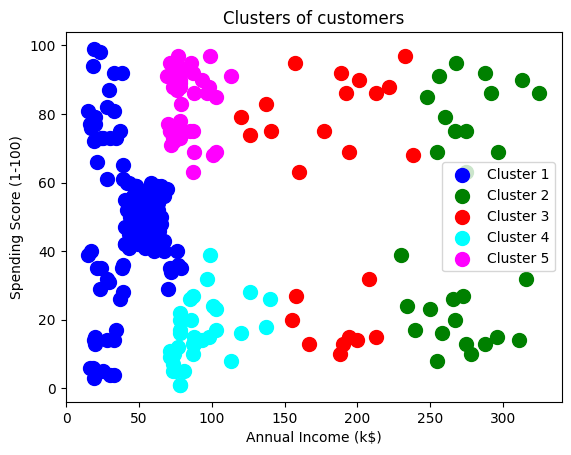

In [10]:
#visulaizing the clusters
mtp.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
mtp.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
mtp.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
mtp.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
mtp.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
mtp.title('Clusters of customers')
mtp.xlabel('Annual Income (k$)')
mtp.ylabel('Spending Score (1-100)')
mtp.legend()
mtp.show()

### Learning outcomes
* Hierarchical clustering is an unsupervised machine-learning technique used for grouping similar data points.
* Unlike K-means clustering, it creates a tree-like structure (dendrogram) to organize the data into clusters.
* Dendrograms visually represent the hierarchical relationships between data points.
* Interpreting dendrograms to make informed decisions about the number of clusters.